#### 繪圖相關套件
- Matplotlib：Python 最常被使用到的繪圖套件
- Seaborn：以 matplotlib 為底層的高階繪圖套件

<BarContainer object of 3 artists>

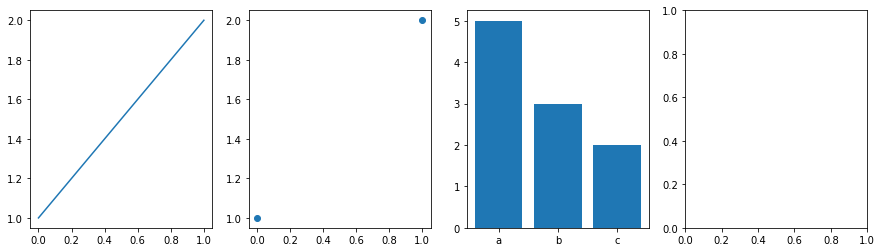

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1,ncols=4) #分割
fig.set_size_inches(15, 4) # 畫布大小
axes[0].plot([0,1],[1,2]) #.plot 直線
axes[1].scatter([0,1],[1,2]) #.scatter 點
axes[2].bar(["a",'b','c'],[5,3,2]) #.bar 長條圖

c:\Users\bluesky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


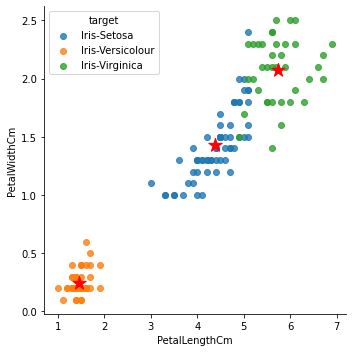

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
#y = df_data['Species']

kmeansModel = KMeans(n_clusters=3, random_state=46)
clusters_pred = kmeansModel.fit_predict(X) #分類結果

df_data['Predict']=clusters_pred


sns.lmplot("PetalLengthCm", "PetalWidthCm", data=df_data, hue="Predict", fit_reg=False, legend=False) #放入目標data所有位置
plt.scatter(kmeansModel.cluster_centers_[:, 2], kmeansModel.cluster_centers_[:, 3], s=200,c="r",marker='*') #畫星號
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica']) #放入label
plt.show()

c:\Users\bluesky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


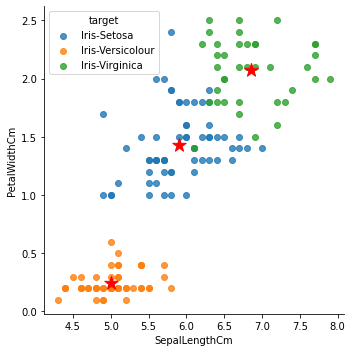

In [45]:
df_data['Predict']=clusters_pred
sns.lmplot("SepalLengthCm", "PetalWidthCm", data=df_data, hue="Predict", fit_reg=False, legend=False) #放入目標data所有位置
plt.scatter(kmeansModel.cluster_centers_[:, 0], kmeansModel.cluster_centers_[:, 3], s=200,c="r",marker='*') #畫星號
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica']) #放入label
#plt.axis([4,9,0,3])
plt.show()

#### plt.annotate(s, xy, *args, **kwargs)
annotate用於在圖形上給資料新增文字註解，而且支援帶箭頭的劃線工具，方便我們在合適的位置新增描述資訊。
- s：註釋文字的內容
- xy：被註釋的座標點，二維元組形如(x,y)
- xytext：註釋文字的座標點，也是二維元組，預設與xy相同
- xycoords：被註釋點的座標系屬性，允許輸入的值如下
    * 'figure points' :	以繪圖區左下角為參考，單位是點數
    * 'figure pixels' : 以繪圖區左下角為參考，單位是畫素數
    * 'figure fraction' : 以繪圖區左下角為參考，單位是百分比
    * 'axes points'	 :  以子繪圖區左下角為參考，單位是點數（一個figure可以有多個axex，預設為1個）
    * 'axes pixels'	 :  以子繪圖區左下角為參考，單位是畫素數
    * 'axes fraction' : 以子繪圖區左下角為參考，單位是百分比
    * 'data'	 :      以被註釋的座標點xy為參考 (預設值)
    * 'polar'	 :      不使用本地資料座標系，使用極座標系

- textcoords ：註釋文字的座標系屬性，預設與xycoords屬性值相同，也可設為不同的值。除了允許輸入xycoords的屬性值，還允許輸入以下兩種
    * 'offset points'	相對於被註釋點xy的偏移量（單位是點）
    * 'offset pixels'	相對於被註釋點xy的偏移量（單位是畫素）

- arrowprops：箭頭的樣式，dict（字典）型資料，如果該屬性非空，則會在註釋文字和被註釋點之間畫一個箭頭。如果不設定'arrowstyle' 關鍵字，則允許包含以下關鍵字：
    * width	箭頭的寬度（單位是點）
    * headwidth	箭頭頭部的寬度（點）
    * headlength	箭頭頭部的長度（點）
    * shrink	箭頭兩端收縮的百分比（佔總長

參考 : https://www.796t.com/content/1544608110.html

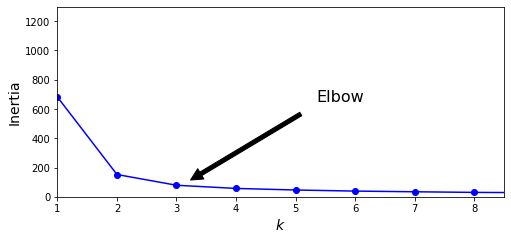

In [38]:
# k = 1~9 做9次kmeans, 並將每次結果的inertia收集在一個list裡
kmeans_list = [KMeans(n_clusters=k, random_state=46).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_list]

plt.figure(figsize=(8, 3.5)) #圖大小
plt.plot(range(1, 10), inertias, "bo-") #bo- : 圓點 跟 線
plt.xlabel("$k$", fontsize=14) #斜體k ,大小14
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[3]), #箭頭的頭
             xytext=(0.55, 0.55), #箭頭的尾巴
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()